In [1]:
import cv2     # Thư viện OpenCV
import numpy as np   # Thư viện numy để làm việc dữ liệu kiểu mảng
import matplotlib.pyplot as plt # import thư viện matplotlib để vẽ ảnh

In [2]:
# Định nghĩa hàm Tich_chap() để lọc Trung bình, Trung bình có trọng số và lọc Gaussian
def Tich_chap(img,mask):
    m, n = img.shape
    img_new = np.zeros([m, n])
    for i in range(1, m-1):
        for j in range(1, n-1):
            temp   =  img[i-1, j-1]    * mask[0, 0]\
                   +  img[i, j-1]      * mask[0, 1]\
                   +  img[i+1, j - 1]  * mask[0, 2]\
                   +  img[i-1, j]      * mask[1, 0]\
                   +  img[i, j]        * mask[1, 1]\
                   +  img[i+1, j]      * mask[1, 2]\
                   +  img[i - 1, j+1]  * mask[2, 0]\
                   +  img[i, j + 1]    * mask[2, 1]\
                   +  img[i + 1, j + 1]* mask[2, 2]
            img_new[i, j]= temp
    img_new = img_new.astype(np.uint8)
    return img_new

In [3]:
# Định nghĩa bộ lọc Laplacian chuẩn
locLaplacian_chuan = np.array(([0, 1, 0],
                               [1, -4, 1],
                               [0, 1, 0]), dtype="float")

# Định nghĩa bộ lọc Laplacian biến thể 1
locLaplacian_Bien_The_1 = np.array(([1, 1, 1],
                                    [1, -8, 1],
                                    [1, 1, 1]), dtype="float")

# Định nghĩa bộ lọc Laplacian biến thể 2
locLaplacian_Bien_The_2 = np.array(([0, -1, 0],
                                    [-1, 4, -1],
                                    [0, -1, 0]), dtype="float")

# Định nghĩa bộ lọc Laplacian biến thể 3
locLaplacian_Bien_The_3 = np.array(([-1, -1, -1],
                                    [-1, 8, -1],
                                    [-1, -1, -1]), dtype="float")


locLaplacian_Cai_Thien = np.array(([-1, -1, -1],
                                    [-1, 5, -1],
                                    [-1, -1, -1]), dtype="float")

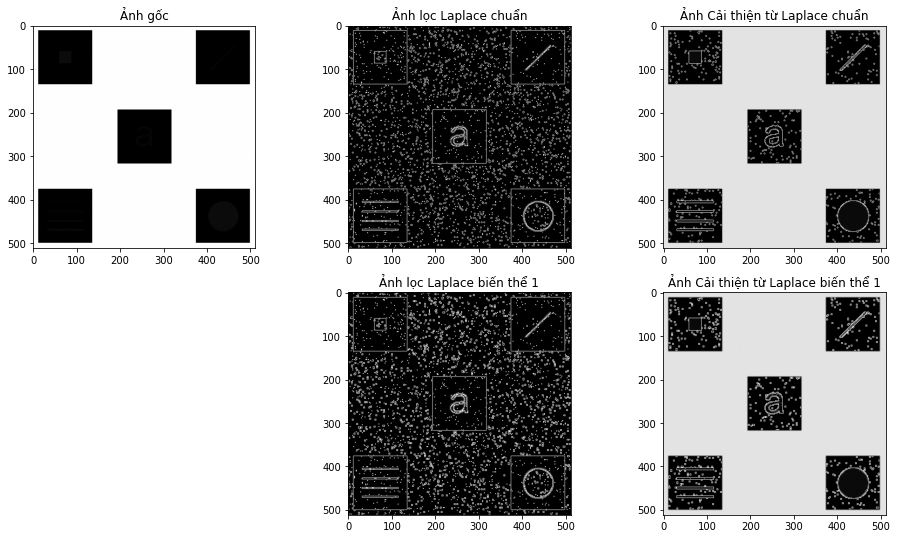

In [6]:
fig = plt.figure(figsize=(16, 9)) # Tạo vùng vẽ tỷ lệ 16:9
(ax1, ax2, ax3), (ax4, ax5, ax6) = fig.subplots(2, 3) # Tạo 6 vùng vẽ con

# Đọc và hiển thị ảnh gốc
image = cv2.imread('/content/test2.tif', 0)
ax1.imshow(image, cmap='gray')
ax1.set_title("Ảnh gốc")

# Lọc Laplacian chuẩn và hiển thị ảnh
img_loc_Laplacian_chuan = Tich_chap(image, locLaplacian_chuan) #Gọi hàm tích chập
ax2.imshow(img_loc_Laplacian_chuan, cmap='gray')
ax2.set_title("Ảnh lọc Laplace chuẩn")

# Tạo ảnh cải thiện từ lọc Laplacian chuẩn và hiển thị ảnh
img_cai_thien_locLaplacian_chuan = image - img_loc_Laplacian_chuan
ax3.imshow(img_cai_thien_locLaplacian_chuan, cmap='gray')
ax3.set_title("Ảnh Cải thiện từ Laplace chuẩn")

#Không hiển thị trục tọa độ tại vùng ax4
ax4.axis('off')

# Lọc Laplacian Biến thể thứ nhất và hiển thị ảnh
img_loc_Laplacian_Bien_The_1 = Tich_chap(image, locLaplacian_Bien_The_1) #Gọi hàm tích chập
ax5.imshow(img_loc_Laplacian_Bien_The_1, cmap='gray')
ax5.set_title("Ảnh lọc Laplace biến thể 1")

# Tạo ảnh cải thiện từ lọc Laplacian Biến thể thứ nhất và hiển thị ảnh
img_cai_thien_loc_Laplacian_Bien_The_1 = image - img_loc_Laplacian_Bien_The_1
ax6.imshow(img_cai_thien_loc_Laplacian_Bien_The_1, cmap='gray')
ax6.set_title("Ảnh Cải thiện từ Laplace biến thể 1")

# Hiển thị vùng vẽ
plt.show()

# Việc thực hiện các biến thể của bộ lọc Laplacian thực hiện code tương tự
# nhưng thay thế mặc nạ lọc khác nhau
# Việc thực hiện bộ lọc đơn giản hóa Laplacian thì ảnh lọc chính là ảnh kết quả